### Note

Repository
https://github.com/Wikar235/disease-recognition

Project
https://github.com/users/Wikar235/projects/2

Data
https://www.kaggle.com/datasets/lokisilvres/dental-disease-panoramic-detection-dataset

In [1]:
!tree /Users/syatsuzuka/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6 -d

/Users/syatsuzuka/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6
├── COCO
│   └── COCO
│       ├── annotations
│       ├── test
│       ├── train
│       └── valid
└── YOLO
    └── YOLO
        ├── test
        │   ├── images
        │   └── labels
        ├── train
        │   ├── images
        │   └── labels
        └── valid
            ├── images
            └── labels

18 directories


### Load Data

#### Image download

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lokisilvres/dental-disease-panoramic-detection-dataset")

print("Path to dataset files:", path)

/Users/syatsuzuka/.pyenv/versions/3.10.6/envs/disease-recognition/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/syatsuzuka/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6


#### Listing up image files

##### Training data

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

image_extensions = ['.jpg', '.jpeg', '.png', '.tiff', '.bmp']
count_train = 0
files_train = []
files_train_labels = []

for root, dirs, files in os.walk(path+"/YOLO/YOLO/train"):
    for file in files:
        if any(file.lower().endswith(ext) for ext in image_extensions):
            count_train += 1
            files_train.append(os.path.join(root, file))
            files_train_labels.append(os.path.join(root.replace('/images', '/labels'), os.path.splitext(file)[0] + '.txt'))

##### Test data

In [ ]:
count_test = 0
files_test = []
files_test_labels = []

for root, dirs, files in os.walk(path+"/YOLO/YOLO/test"):
    for file in files:
        if any(file.lower().endswith(ext) for ext in image_extensions):
            count_test += 1
            files_test.append(os.path.join(root, file))
            files_test_labels.append(os.path.join(root.replace('/images', '/labels'), os.path.splitext(file)[0] + '.txt'))

##### Validation data

In [73]:
count_valid = 0
files_valid = []
files_valid_labels = []

for root, dirs, files in os.walk(path+"/YOLO/YOLO/valid"):
    for file in files:
        if any(file.lower().endswith(ext) for ext in image_extensions):
            count_valid += 1
            files_valid.append(os.path.join(root, file))
            files_valid_labels.append(os.path.join(root.replace('/images', '/labels'), os.path.splitext(file)[0] + '.txt'))

#### Sample Image check

0 /Users/syatsuzuka/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6/COCO/COCO/train/3585150000-jpg_png_jpg.rf.45c5a7e150f53076399c33479c775ab8.jpg
Image shape: (640, 640, 3)
Image data type: uint8
Min pixel value: 0
Max pixel value: 255
1 /Users/syatsuzuka/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6/COCO/COCO/train/3832840000-jpg_png_jpg.rf.917a84a8314fc4b44f3ffec2be024915.jpg
Image shape: (840, 1615, 3)
Image data type: uint8
Min pixel value: 0
Max pixel value: 255
2 /Users/syatsuzuka/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6/COCO/COCO/train/9ca39105-MORTAJI_SAEIDEH_2020-06-16104607_jpg.rf.c7fed91c49456945ae346784f51b2e16.jpg
Image shape: (840, 1615, 3)
Image data type: uint8
Min pixel value: 0
Max pixel value: 255
3 /Users/syatsuzuka/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6/COCO/COCO/train/2777

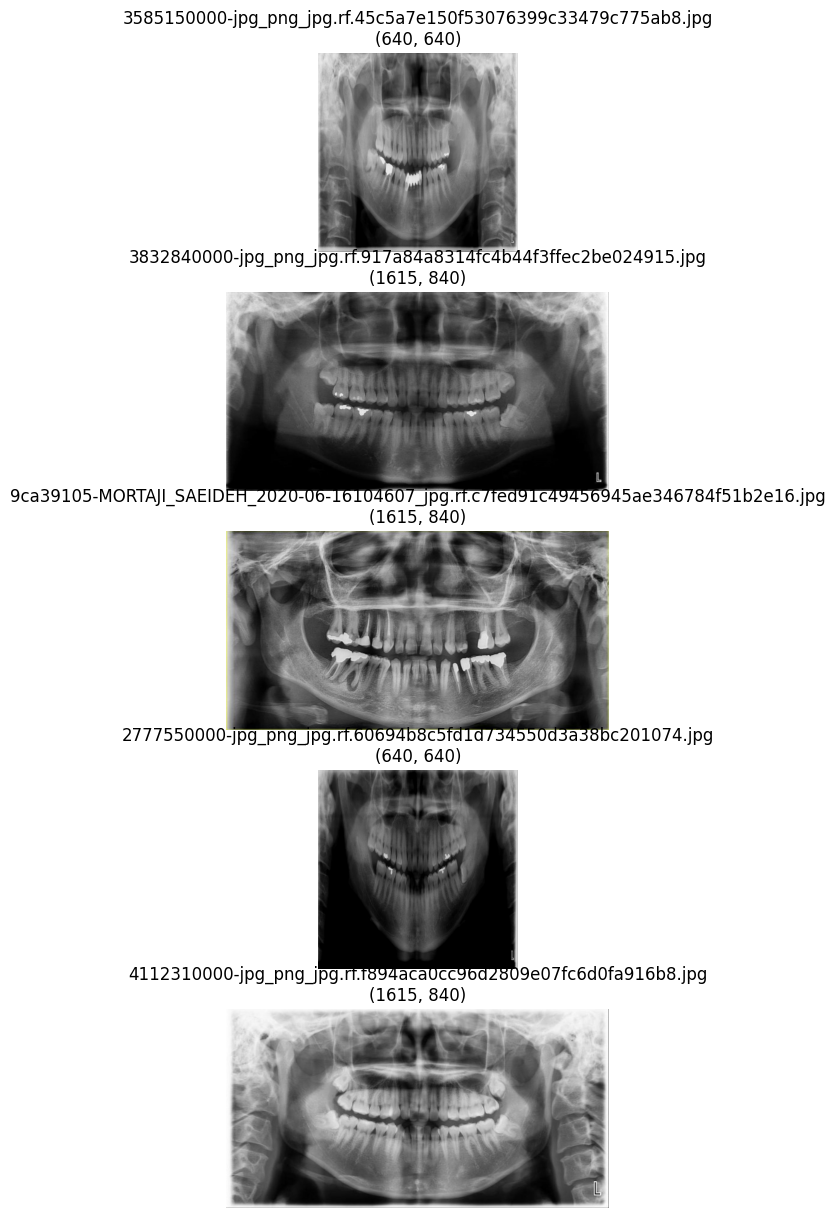

In [8]:
plt.figure(figsize=(20, 15))
img = []

for i, img_file in enumerate(files_train):
    if (i >= 5):
        break

    print(i, img_file)
    img.append(Image.open(os.path.join(root, img_file)))
    numpy_array_pil = np.array(img[i])

    print("Image shape:", numpy_array_pil.shape)
    print("Image data type:", numpy_array_pil.dtype)
    print("Min pixel value:", numpy_array_pil.min())
    print("Max pixel value:", numpy_array_pil.max())

    plt.subplot(5, 1, i+1)
    plt.imshow(img[i], cmap='gray' if img[i].mode == 'L' else None)
    plt.title(f"{os.path.basename(img_file)}\n{img[i].size}")
    plt.axis('off')

##### Loading training data

In [ ]:
X_train = []

for i, img_file in enumerate(files_train):
    img = Image.open(os.path.join(root, img_file))
    X_train.append(np.array(img))


##### Loading test data

In [ ]:
X_test = []

for i, img_file in enumerate(files_test):
    img = Image.open(os.path.join(root, img_file))
    X_test.append(np.array(img))

Loading validation data

In [ ]:
X_valid = []

for i, img_file in enumerate(files_valid):
    img = Image.open(os.path.join(root, img_file))
    X_valid.append(np.array(img))

### Read labels

In [ ]:
def read_coco_labels(label_file, img_width, img_height):

    labels = []

    if os.path.exists(label_file):
        with open(label_file, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) != 5:
                    continue  # skip invalid line
                class_id, x_center, y_center, w, h = map(float, parts)

                x_center_abs = x_center * img_width
                y_center_abs = y_center * img_height
                w_abs = w * img_width
                h_abs = h * img_height

                labels.append([class_id, x_center_abs, y_center_abs, w_abs, h_abs])

    return np.array(labels)

In [36]:
def read_yolo_polygon(label_file, img_width, img_height):

    polygons = []

    if os.path.exists(label_file):
        with open(label_file, "r") as f:
            for line in f:
                parts = line.strip().split()
                class_id = int(parts[0])
                coords = list(map(float, parts[1:]))
                points = [(coords[i] * img_width, coords[i+1] * img_height)
                          for i in range(0, len(coords), 2)]
                polygons.append((class_id, points))

    # print("label_file:", label_file)

    # for polygon in polygons:
    #     print("Polygon class_id:", polygon[0], ", # of points:", len(polygon[1]), ", Points:", polygon[1])

    return polygons

In [81]:
label_path = path+"/YOLO/YOLO/train/labels"

all_labels = []

for i, img_file in enumerate(files_train):
    base_name = os.path.basename(img_file)
    name_no_ext = os.path.splitext(base_name)[0]
    label_file = os.path.join(label_path, name_no_ext + '.txt')

    # Check if label file exists
    if not os.path.exists(label_file):
        all_labels.append(np.array([]))  # append empty array for this image
        continue

    # Get image size
    img_obj = Image.open(img_file)
    width, height = img_obj.size

    # Read labels
    labels = read_yolo_polygon(label_file, width, height)
    all_labels.append(labels)


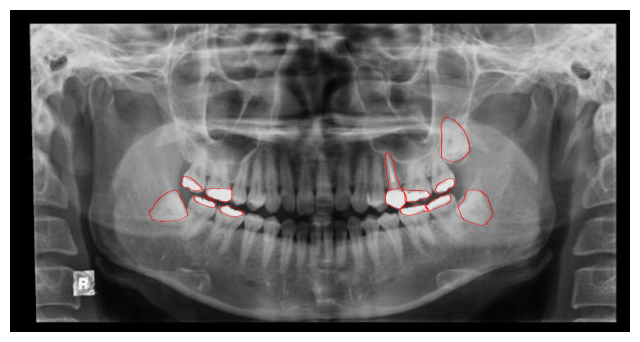

In [85]:
# Open image
index = 100

img = Image.open(files_train[index])
width, height = img.size

# Read polygons from its label
if os.path.exists(files_train_labels[index]):
    polygons = read_yolo_polygon(files_train_labels[index], width, height)
else:
    print("Label file does not exist:", files_train_labels[index])
    polygons = []

# Draw polygons
draw = ImageDraw.Draw(img)
for class_id, points in polygons:
    draw.polygon(points, outline="red", width=2)
    # for x, y in points:
    #     draw.ellipse((x-2, y-2, x+2, y+2), fill="blue")

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.show()